**Name: Hoda Shoghi**

**Contact: hoda.shoghi@gmail.com**

**Date: 27 July 2023**

### Project Title: 

# Predicting Restaurant Ratings: A Data-Driven Approach

### Step1: Cleaning and EDA:
As 1st step I  will perform basic EDA and data cleaning to get familiarize with Yelp's business dataset.

#### Dataset
The Yelp dataset offers a wealth of information about businesses across several cities. This project focuses specifically on restaurant businesses. The dataset includes attributes such as business ID, name, location, review count, categories, and star ratings.

| COLUMN NAME  | DESCRIPTION                                                    | DATA TYPE |
|--------------|----------------------------------------------------------------|-----------|
| business_id  | Unique identifier for the business                             | string    |
| name         | Name of the business                                           | string    |
| address      | Address where the business is located                          | string    |
| city         | City where the business is located                             | string    |
| state        | State where the business is located                            | string    |
| postal_code  | postal_code where the business is located                      | string    |
| latitude     | Geographical latitude of the business                          | float64   |
| longitude    | Geographical longitude of the business                         | float64   |
| stars        | Star rating of the business                                    | float64   |
| review_count |  Number of reviews the business has received                   | int64     |
| is_open      | 0 is closed and 1 is open                                      | int64     |
| attributes   | different attribute like payment method, delivery options, etc | string    |
| categories   | Categories the business falls under                            | string    |
| hours        | Hours of operation                                             | string    |


#### Data Notes :
1- Yelp's dataset covers various types of businesses. For this project, I focus on businesses categorized as "Restaurants".

2- The 'categories' column can contain multiple categories for a single business. For example, a restaurant can be categorized as both 'Italian' and 'Pizza'.

3- Yelp users rate businesses on a scale of 1 to 5 stars. This serves as our target variable, which we aim to predict with our model.

#### My goal :

My goal is to build a predictive model that can accurately predict a restaurant's star rating by leveraging the vast amount of information in the dataset. This model can provide prospective Steakholders with insights into how certain factors might influence their new establishment's ratings.



### Step1-2  Basic Data Wrangling
1- What is the shape of the dataframe?

2- What kind of data is stored in each column? How are they distributed?

3- Are there any columns that contain duplicate information? If so, remove the redundant columns.

4- Are there any null values in the dataframe? If so, handle them appropriately.


1- What is the shape of the dataframe?

First lets open the **jason** datasaet which is downloaded from Yelp website

In [68]:
import pandas as pd

df_b = pd.read_json('data/yelp_business.json', lines=True)


1-What's the shape opf data frame?

In [69]:
df_b.shape

(150346, 14)

2-What kind of data is stored in each column?

Lets have a look at the head of the datafram:

In [70]:
df_b.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


## " is_open" Column

In [71]:
df_b['is_open'].value_counts()

1    119698
0     30648
Name: is_open, dtype: int64

The DataFrame contains a column 'is_open', which carries binary values - 0 signifies a closed business, while 1 indicates an open one. For the purpose of our analysis, which is focused on open businesses, we will filter the DataFrame to only include rows where 'is_open' is equal to 1.

In [72]:
# 1 = open, 0 = closed
df_b = df_b[df_b['is_open']==1]
df_b['is_open'].value_counts()

1    119698
Name: is_open, dtype: int64

## " state" Column

In [73]:
df_b['state'].value_counts()

PA     26289
FL     21540
TN      9600
IN      8946
MO      8363
AZ      8108
LA      7676
NJ      7031
NV      6277
AB      4346
CA      4065
ID      3783
DE      1894
IL      1765
TX         4
WA         2
MA         2
HI         1
UT         1
CO         1
MI         1
SD         1
XMS        1
VT         1
Name: state, dtype: int64

Looking at the value counts, it's apparent that our dataset doesn't cover all the states in the US. However, `Pennsylvania`, the state we're interested in, is well represented. Consequently, we can safely discard data related to the other states.

In [74]:
df_b = df_b[df_b['state'] == 'PA']
#Sanity check
df_b['state'].value_counts()

PA    26289
Name: state, dtype: int64

## " attribute" Column

Observing the `attributes` and `hours` columns, we find that they contain dictionaries. Therefore, it would be beneficial to unpack or "explode" these dictionaries into separate columns for better analysis and understanding of the data.

Let's first look at what's inside the attributes column. We need to see what keys are there and decide if these keys give us useful information for our project. Should we keep them as new columns?

In [75]:
print(df_b['attributes'].head())


3     {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4     {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
15    {'RestaurantsReservations': 'True', 'Restauran...
19    {'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...
25                                                 None
Name: attributes, dtype: object


In [112]:
keys = set()

for attr in df_b['attributes']:
    if isinstance(attr, dict):  # check if the entry is a dictionary
        keys.update(attr.keys())

print('\n'.join(keys))


BestNights
DogsAllowed
GoodForDancing
ByAppointmentOnly
HappyHour
RestaurantsTableService
CoatCheck
BYOBCorkage
RestaurantsCounterService
Alcohol
Open24Hours
OutdoorSeating
WiFi
HairSpecializesIn
BikeParking
RestaurantsPriceRange2
RestaurantsTakeOut
AcceptsInsurance
BusinessAcceptsBitcoin
BusinessParking
DietaryRestrictions
RestaurantsAttire
Caters
RestaurantsDelivery
HasTV
BusinessAcceptsCreditCards
WheelchairAccessible
BYOB
NoiseLevel
DriveThru
RestaurantsReservations
Music
Smoking
GoodForKids
GoodForMeal
RestaurantsGoodForGroups
Ambience
AgesAllowed
Corkage


The columns that hold significant information for our analysis are **: 'HappyHour', 'RestaurantsReservations', 'DogsAllowed', 'OutdoorSeating', 'WheelchairAccessible', 'RestaurantsGoodForGroups', 'Open24Hours', and 'BusinessParking'**. 

These are considered valuable and will be retained for our study.

In [77]:
import ast
import numpy as np

# Convert the strings into dictionaries for 'attributes' column
df_b['attributes'] = df_b['attributes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

keys_to_keep = ['HappyHour', 'RestaurantsReservations', 'DogsAllowed', 'OutdoorSeating', 'WheelchairAccessible', 'RestaurantsGoodForGroups', 'Open24Hours', 'BusinessParking']

# For each key, create a new column in the DataFrame
for key in keys_to_keep:
    df_b[key] = df_b['attributes'].apply(lambda x: x.get(key) if isinstance(x, dict) else np.nan)

# Now convert the strings into dictionaries for 'BusinessParking' column
df_b['BusinessParking'] = df_b['BusinessParking'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

business_parking_keys = set()

# Find all keys in 'BusinessParking' column
for entry in df_b['BusinessParking'].dropna():
    if isinstance(entry, dict):
        business_parking_keys.update(entry.keys())

# For each key in 'BusinessParking', create a new column in the DataFrame
for key in business_parking_keys:
    df_b[key] = df_b['BusinessParking'].apply(lambda x: x.get(key) if isinstance(x, dict) else np.nan)


In [78]:
#Sanity Check
df_b.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'HappyHour',
       'RestaurantsReservations', 'DogsAllowed', 'OutdoorSeating',
       'WheelchairAccessible', 'RestaurantsGoodForGroups', 'Open24Hours',
       'BusinessParking', 'validated', 'garage', 'lot', 'street', 'valet'],
      dtype='object')

In [79]:
#Sanity Check
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26289 entries, 3 to 150336
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   business_id               26289 non-null  object 
 1   name                      26289 non-null  object 
 2   address                   26289 non-null  object 
 3   city                      26289 non-null  object 
 4   state                     26289 non-null  object 
 5   postal_code               26289 non-null  object 
 6   latitude                  26289 non-null  float64
 7   longitude                 26289 non-null  float64
 8   stars                     26289 non-null  float64
 9   review_count              26289 non-null  int64  
 10  is_open                   26289 non-null  int64  
 11  attributes                23668 non-null  object 
 12  categories                26266 non-null  object 
 13  hours                     22433 non-null  object 
 14  Happy

Note : Later we decide how to combine when we want to create dummy vars 

## " categories" Column


When analyzing the `categories` column in the DataFrame, df_b. I noticed that the categories is messy and contains a wide array of businesses, not just restaurants.

In [80]:
df_b['categories'].value_counts()

Beauty & Spas, Nail Salons                                                                                                  224
Restaurants, Pizza                                                                                                          223
Nail Salons, Beauty & Spas                                                                                                  217
Pizza, Restaurants                                                                                                          205
Chinese, Restaurants                                                                                                        143
                                                                                                                           ... 
Financial Services, Accountants, Tax Services, Professional Services                                                          1
Makeup Artists, Skin Care, Beauty & Spas, Cosmetics & Beauty Supply, Shopping                           

I began by identifying rows with null values in the categories column, as these would not be useful in my restaurant-focused analysis. I then removed these rows from the DataFrame 

In [81]:
df_b.dropna(subset=['categories'], inplace=True)
df_b.shape

(26266, 27)

Next, I wanted to standardize the text in the categories column to prevent any discrepancies due to capitalization or leading/trailing spaces. So, I converted all the category names to lower case using the str.lower() method and removed any unnecessary spaces at the beginning or end of these category names with the str.strip() method.

In [82]:
df_b['categories'] = df_b['categories'].str.lower().str.strip()

Subsequently, to focus on the businesses that are related to restaurants, I created a new DataFrame, filtered_df. This DataFrame includes only those rows where the categories column contains the word **restaurants** . I utilized the str.contains() method to filter out such rows. The shape of the filtered_df indicates the number of businesses categorized as 'restaurants'.

In [83]:
filtered_df = df_b[df_b['categories'].str.contains('restaurants')]
filtered_df.shape

(8069, 27)

After filtering the data, I noticed that the categories were disordered, which might result in counting 'pizza, restaurants' and 'restaurants, pizza' as two separate categories.

In [84]:
filtered_df['categories'].value_counts().head(10)


restaurants, pizza             223
pizza, restaurants             205
chinese, restaurants           143
restaurants, chinese           131
restaurants, mexican            70
mexican, restaurants            61
restaurants, italian            49
italian, restaurants            38
restaurants, delis              31
restaurants, american (new)     31
Name: categories, dtype: int64

To tackle this issue, I decided to clean up the categories column to ensure uniformity. I split the categories by commas, sorted them, and then joined them back together. This step ensured that the combination 'pizza, restaurants' and 'restaurants, pizza' are treated as the same.

In [85]:

filtered_df['categories'] = filtered_df['categories'].apply(lambda x: ', '.join(sorted(x.split(', '))))


/var/folders/0t/7qv1vmrs6l10yk4t5m_54jnr0000gn/T/ipykernel_74441/2143311517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['categories'] = filtered_df['categories'].apply(lambda x: ', '.join(sorted(x.split(', '))))


After this cleaning step, I checked the value counts again and observed a more consolidated and meaningful categorization, enhancing the reliability of my analysis.

In [86]:

# Now check the value counts
print(filtered_df['categories'].value_counts().head(10))


pizza, restaurants                                     428
chinese, restaurants                                   274
italian, pizza, restaurants                            136
mexican, restaurants                                   131
burgers, fast food, restaurants                        104
burgers, coffee & tea, fast food, food, restaurants    102
italian, restaurants                                    87
american (new), restaurants                             61
japanese, restaurants, sushi bars                       55
italian, pizza, restaurants, sandwiches                 54
Name: categories, dtype: int64


After cleaning up the categories, I wanted to see a detailed count of individual categories instead of combinations. Therefore, I split the categories again (this time on a granular level), and then used the explode function to transform each element of a list-like to a row, replicating index values. This resulted in a DataFrame where each row represents a single category for a restaurant.

In [87]:
df_explode2 = filtered_df.assign(categories = filtered_df.categories.str.split(', ')).explode('categories')

By setting the display option for max_rows to None using a context manager, I was able to display all rows in the output, even if the number exceeded the default setting in pandas. With this configuration, I could display all individual category counts using value_counts().

In [88]:
# Use a context manager to temporarily set the display option for max_rows
with pd.option_context('display.max_rows', None):
    # Display value counts for the 'categories' column in filtered_df2
    categories_counts = df_explode2['categories'].value_counts()
    print(categories_counts)

restaurants                         8069
food                                2584
pizza                               1503
sandwiches                          1474
nightlife                           1266
bars                                1217
american (traditional)              1196
breakfast & brunch                   927
italian                              909
american (new)                       842
coffee & tea                         794
burgers                              700
fast food                            691
chinese                              629
event planning & services            582
seafood                              521
delis                                496
mexican                              494
salad                                480
cafes                                405
caterers                             376
bakeries                             375
chicken wings                        374
specialty food                       322
japanese        

last step provided a more in-depth understanding of the composition of categories, helping me identify the most prevalent types of restaurants, such as 'restaurants', 'food', 'sandwiches', and 'nightlife', among others.

In [89]:
filtered_df2=df_explode2[df_explode2['categories'] != 'restaurants']

I removed the 'restaurants' category since it was already present in all rows due to the previous filters, and its occurrence count was not reflective of individual businesses but rather a subset of the entire dataset.

Additionally, I removed the 'food' category as it was not a very clear category and didn't provide meaningful insights for my analysis. 

In [90]:
filtered_df2 = filtered_df2[filtered_df2['categories'] != 'food']

In [91]:
# Use a context manager to temporarily set the display option for max_rows
with pd.option_context('display.max_rows', None):
    # Display value counts for the 'categories' column in filtered_df2
    categories_counts = filtered_df2['categories'].value_counts()
    print(categories_counts)

pizza                               1503
sandwiches                          1474
nightlife                           1266
bars                                1217
american (traditional)              1196
breakfast & brunch                   927
italian                              909
american (new)                       842
coffee & tea                         794
burgers                              700
fast food                            691
chinese                              629
event planning & services            582
seafood                              521
delis                                496
mexican                              494
salad                                480
cafes                                405
caterers                             376
bakeries                             375
chicken wings                        374
specialty food                       322
japanese                             321
asian fusion                         267
desserts        

After analyzing the frequency of different categories in the 'categories' column, I decided to keep only those categories that appeared more than 20 times in the dataset. By filtering out less frequent categories, I aimed to focus on the more prevalent and representative business types in the analysis. 

In [92]:
# Calculate the value counts of each category in the 'categories' column
categories_counts = filtered_df2['categories'].value_counts()

# Identify categories with a count less than 20
categories_to_keep = categories_counts[categories_counts >= 20].index

# Filter the DataFrame to keep only the rows with categories that have a count >= 20
filtered_df2 = filtered_df2[filtered_df2['categories'].isin(categories_to_keep)]

filtered_df2['categories'].value_counts()

pizza                     1503
sandwiches                1474
nightlife                 1266
bars                      1217
american (traditional)    1196
                          ... 
poke                        23
international grocery       21
cheese shops                21
karaoke                     20
health markets              20
Name: categories, Length: 122, dtype: int64

After further refining the analysis, I identified `non-informative categories` that do not provide significant insight into the type of food or cuisine offered by the restaurant. These categories are often generic or non-food related. Here is the PART1 of expanded list of the non-informative categories that I removed, i did this in repetative steps 

In [93]:
non_informative_categories = [
    "arts & entertainment", "shopping", "automotive",
    "gas stations", "active life", "fitness & instruction", "local services",
    "beauty & spas", "hotels & travel", "specialty food", "local flavor", "professional services",
    "public services & government", "education", "health & medical", "home services", "cinema",
    "doctors", "flowers & gifts", "home & garden", "pets", "drugstores", "books, mags, music & video",
    "fashion", "department stores", "internet cafes", "tours", "music venues", "personal chefs",
    "community service/non-profit", "hotels", "resorts", "religious organizations",
    "kids activities", "performing arts", "real estate", "sporting goods", "indoor playcentre",
    "landmarks & historical buildings", "boating", "art galleries", "social clubs",
    "bed & breakfast", "gift shops", "adult entertainment", "dance clubs", "piano bars",
    "swimming pools", "amusement parks", "golf", "bowling", "arcades", "do-it-yourself food",
    "beaches"]



I then used the ~df['categories'].isin(non_informative_categories) expression to filter out these non-informative categories from the DataFrame. The resulting DataFrame, filtered_df3, contains only the informative and relevant categories related to food and cuisine offered by the restaurants for a more focused analysis.

In [94]:
# Use ~df['categories'].isin(non_informative_categories) to filter out these categories
filtered_df3 = filtered_df2[~filtered_df2['categories'].isin(non_informative_categories)]


In [95]:
# Use a context manager to temporarily set the display option for max_rows
with pd.option_context('display.max_rows', None):
    # Display value counts for the 'categories' column in filtered_df2
    categories_counts = filtered_df2['categories'].value_counts()
    print(categories_counts)

pizza                        1503
sandwiches                   1474
nightlife                    1266
bars                         1217
american (traditional)       1196
breakfast & brunch            927
italian                       909
american (new)                842
coffee & tea                  794
burgers                       700
fast food                     691
chinese                       629
event planning & services     582
seafood                       521
delis                         496
mexican                       494
salad                         480
cafes                         405
caterers                      376
bakeries                      375
chicken wings                 374
specialty food                322
japanese                      321
asian fusion                  267
desserts                      264
sushi bars                    261
pubs                          253
cheesesteaks                  249
sports bars                   234
vegetarian    


Looking at the provided data, the following actions seem appropriate for a cleaner and shorter list of categories. Please remember that this is a suggested approach and depending on your specific use case, you might need to adjust these categories:

Combine Categories:

'Bars & Nightlife': Merge categories related to bars and nightlife like 'nightlife', 'bars', 'sports bars', 'cocktail bars', 'wine bars', 'beer bar', 'pubs', 'lounges', 'dive bars', 'whiskey bars', 'tiki bars', 'beer gardens', 'pool halls', 'jazz & blues', 'piano bars', 'irish pub','gay bars','brewpubs'.

'American': Merge 'american (traditional)', 'american (new)'.
'Fast Food & Street Food': Merge 'fast food', 'food trucks', 'street vendors', 'tacos'.

'Cafes & Coffee Shops': Merge 'coffee & tea', 'cafes', 'coffee roasteries', 'juice bars & smoothies', 'bubble tea'.

'Bakeries & Desserts': Merge 'bakeries', 'desserts', 'ice cream & frozen yogurt', 'cupcakes', 'donuts', 'gelato', 'macarons'.

'Asian Cuisine': Merge 'chinese', 'japanese', 'sushi bars', 'asian fusion', 'thai', 'vietnamese', 'korean', 'dim sum', 'ramen'.

'Mexican & Tex-Mex': Merge 'mexican', 'tex-mex'.

'Mediterranean & Middle Eastern Cuisine': Merge 'mediterranean', 'greek', 'lebanese', 'turkish', 'arabic'.

'Italian & Pizza': Merge 'pizza', 'italian', 'pasta shops'.

'Grocery & Convenience Stores': Merge 'grocery', 'convenience stores', 'specialty food', 'fruits & veggies', 'health markets', 'organic stores'.

'Event Services': Merge 'event planning & services', 'caterers', 'party & event planning', 'venues & event spaces'.

In [96]:
# Define a dictionary for each category mapping
category_mapping = {
    'Bars & Nightlife': ['nightlife', 'bars', 'sports bars', 'cocktail bars', 'wine bars', 'beer bar', 'pubs', 'lounges', 'dive bars', 'whiskey bars', 'tiki bars', 'beer gardens', 'pool halls', 'jazz & blues', 'piano bars', 'irish pub','gay bars','brewpubs','tapas bars','gastropubs'],
    'North-American': ['american (traditional)', 'american (new)','canadian (new)','diners','comfort food','local flavor'],
    'Fast Food & Street Food': ['fast food', 'food trucks', 'street vendors','food court','donairs','kebab','wraps','hot dogs'],
    'Cafes & Coffee Shops': ['coffee & tea','tea rooms','patisserie/cake shop', 'cafes', 'coffee roasteries', 'cafeteria','themed cafes', 'juice bars & smoothies', 'bubble tea'],
    'Bakeries & Desserts': ['bakeries', 'desserts', 'ice cream & frozen yogurt', 'cupcakes', 'donuts', 'gelato', 'macarons'],
    'Asian Cuisine': ['chinese', 'japanese', 'sushi bars', 'asian fusion','teppanyaki', 'thai', 'vietnamese', 'korean', 'dim sum', 'ramen', 'filipino','hot pot'],
    'Mexican & Tex-Mex': ['mexican', 'tex-mex', 'tacos','new mexican cuisine'],
    'Mediterranean & Middle Eastern Cuisine': ['mediterranean', 'greek', 'lebanese', 'turkish', 'arabic'],
    'Italian & Pizza': ['pizza', 'italian', 'pasta shops'],
    'Grocery & Convenience Stores': ['grocery', 'convenience stores', 'specialty food', 'fruits & veggies', 'health markets', 'organic stores'],
    'Event Services': ['event planning & services', 'caterers', 'party & event planning', 'venues & event spaces'],
    'Burger & Sandwiches': ['burgers', 'sandwiches',]
}

# Iterate over the dictionary and replace old categories with new ones
for new_category, old_categories in category_mapping.items():
    for old_category in old_categories:
        filtered_df2['categories'] = filtered_df2['categories'].replace(old_category, new_category)

Check the new value counts

In [97]:
# Use a context manager to temporarily set the display option for max_rows
with pd.option_context('display.max_rows', None):
    # Display value counts for the 'categories' column in filtered_df2
    categories_counts = filtered_df2['categories'].value_counts()
    print(categories_counts)

Bars & Nightlife                          3756
Italian & Pizza                           2452
North-American                            2408
Burger & Sandwiches                       2174
Asian Cuisine                             1914
Cafes & Coffee Shops                      1452
Event Services                            1166
Fast Food & Street Food                   1059
Bakeries & Desserts                        928
breakfast & brunch                         927
Grocery & Convenience Stores               744
Mexican & Tex-Mex                          674
seafood                                    521
delis                                      496
salad                                      480
chicken wings                              374
Mediterranean & Middle Eastern Cuisine     273
cheesesteaks                               249
vegetarian                                 203
steakhouses                                201
wine & spirits                             180
beer         

From the updated categories, it looks like most of the remaining categories can be associated with the restaurant business. However, there are still some categories that may be considered irrelevant or too generic for a restaurant success prediction model. I decided to remove these categories if they are not beneficial for your analysis:

Irrelevant Categories to Remove:
1. 'arts & entertainment'
2. 'active life'
3. 'automotive'
4. 'gas stations'
5. 'hotels'
6. 'beauty & spas'
7. 'local services'
8. 'drugstores'
9. 'health & medical'
10. 'home services'
11. 'fashion'
12. 'florists'
13. 'bed & breakfast'
14. 'tours'
15. 'internet cafes'
16. 'education'
17. 'bowling'
18. 'public services & government'
19. 'performing arts'
20. 'fitness & instruction'
21. 'professional services'
22. 'shopping centers'
23. 'home & garden'
24. 'pets'
25. 'resorts'
26. 'music & video'
27. 'mags'
28. 'books'
29. 'cooking classes'
30. 'real estate'
31. 'religious organizations'
32. 'department stores'
33. 'day spas'
34. 'distilleries'

Combine Categories:
1. 'Vegetarian & Vegan': Merge 'vegetarian', 'vegan'.
2. 'Health & Organic Stores': Merge 'health markets', 'organic stores'.
3. 'Seafood & Fish': Merge 'seafood', 'seafood markets', 'fish & chips'.
4. 'Beverages': Merge 'beer', 'wine & spirits', 'wine tasting room', 'breweries', 'beverage store'.
5. 'Specialty Food': Merge 'ethnic food', 'imported food', 'specialty food', 'international grocery', 'health markets', 'organic stores'.
6. 'Bakeries & Desserts': Add 'custom cakes', 'chocolatiers & shops' to 'Bakeries & Desserts'.
7. 'Entertainment': Merge 'music venues', 'arcades', 'casinos', 'dance clubs', 'adult entertainment', 'jazz & blues'.
8. 'Grocery & Convenience Stores': Add 'grocery' to 'Grocery & Convenience Stores'.

By using similar code as before, I deleted and combined certain categories in the 'categories' column of the DataFrame. As a result of these updates, I now have a more refined set of categories that are closely associated with restaurant success.

In [98]:
# list of irrelevant categories
irrelevant_categories = [
    'arts & entertainment', 'active life', 'automotive', 'gas stations', 'hotels', 
    'beauty & spas', 'local services', 'drugstores', 'health & medical', 'home services',
    'fashion', 'florists', 'bed & breakfast', 'tours', 'internet cafes', 'education',
    'bowling', 'public services & government', 'performing arts', 'fitness & instruction',
    'professional services', 'shopping centers', 'home & garden', 'pets', 'resorts',
    'music & video', 'mags', 'books', 'cooking classes','real estate',
    'religious organizations', 'department stores', 'day spas', 'distilleries','Beverages',
    'wine & spirits','wine tasting room','breweries','music venues','arcades'
    'beverage store','casinos','dance clubs','adult entertainment','jazz & blues'
]

# apply a mask that's True when the category is not in irrelevant_categories
mask = ~filtered_df2['categories'].isin(irrelevant_categories)

# keep only the rows for which the mask is True
filtered_df2 = filtered_df2[mask]


In [99]:
# Use a context manager to temporarily set the display option for max_rows
with pd.option_context('display.max_rows', None):
    # Display value counts for the 'categories' column in filtered_df2
    categories_counts = filtered_df2['categories'].value_counts()
    print(categories_counts)

Bars & Nightlife                          3756
Italian & Pizza                           2452
North-American                            2408
Burger & Sandwiches                       2174
Asian Cuisine                             1914
Cafes & Coffee Shops                      1452
Event Services                            1166
Fast Food & Street Food                   1059
Bakeries & Desserts                        928
breakfast & brunch                         927
Grocery & Convenience Stores               744
Mexican & Tex-Mex                          674
seafood                                    521
delis                                      496
salad                                      480
chicken wings                              374
Mediterranean & Middle Eastern Cuisine     273
cheesesteaks                               249
vegetarian                                 203
steakhouses                                201
beer                                       180
soup         

In [100]:
# Define the mapping of old categories to new ones
new_categories_mapping = {
    'vegetarian': 'Vegetarian & Vegan',
    'vegan': 'Vegetarian & Vegan',
    'seafood': 'Seafood & Fish',
    'seafood markets': 'Seafood & Fish',
    'fish & chips': 'Seafood & Fish',
    'ethnic food': 'Specialty Food',
    'imported food': 'Specialty Food',
    'specialty food': 'Specialty Food',
    'international grocery': 'Specialty Food',
    'custom cakes': 'Bakeries & Desserts',
    'chocolatiers & shops': 'Bakeries & Desserts',
    'grocery': 'Grocery & Convenience Stores'
}

# Update the categories in the DataFrame based on the mapping
filtered_df2.loc[:, 'categories'] = filtered_df2['categories'].replace(new_categories_mapping)


In [101]:
# Use a context manager to temporarily set the display option for max_rows
with pd.option_context('display.max_rows', None):
    # Display value counts for the 'categories' column in filtered_df2
    categories_counts = filtered_df2['categories'].value_counts()
    print(categories_counts)

Bars & Nightlife                          3756
Italian & Pizza                           2452
North-American                            2408
Burger & Sandwiches                       2174
Asian Cuisine                             1914
Cafes & Coffee Shops                      1452
Event Services                            1166
Fast Food & Street Food                   1059
Bakeries & Desserts                        928
breakfast & brunch                         927
Grocery & Convenience Stores               744
Mexican & Tex-Mex                          674
Seafood & Fish                             565
delis                                      496
salad                                      480
chicken wings                              374
Vegetarian & Vegan                         345
Mediterranean & Middle Eastern Cuisine     273
cheesesteaks                               249
steakhouses                                201
beer                                       180
soup         

I repeated this step multiple times, iteratively removing non-informative categories and combining related categories until I arrived at a satisfactory and well-curated list of categories that are highly relevant to restaurant success. This iterative process allowed me to continuously refine and improve the quality of the data, ensuring that the final list of categories provides valuable insights into the types of restaurants in the dataset.

In [102]:
# The # The list of categories to remove
irrelevant_categories = ['gift shops', 'art galleries', 'indoor playcentre', 'do-it-yourself food', 
                         'festivals', 'social clubs', 'personal chefs', 'kids activities', 
                         'arts & crafts', 'country clubs', 'kosher', 'british', 
                         'wedding planning', 'pop-up restaurants', 'flowers & gifts', 
                         'golf', 'farmers market','arcades', 'pretzels', 'hotels & travel', 'shopping','cheese shops',
                         'smokehouse', 'brasseries','beverage store','dinner theater','tobacco shops','honduran',
                         'meat shops','butcher','chicken shop'
                        ]

# Filter dataframe to remove irrelevant categories
filtered_df2 = filtered_df2[~filtered_df2['categories'].isin(irrelevant_categories)]

# Define new categories mapping

In [103]:

# Define new categories mapping
new_categories_mapping = {
    'argentine': 'South American Cuisine',
    'empanadas': 'South American Cuisine',
    'brazilian': 'South American Cuisine',
    'colombian': 'South American Cuisine',
    'peruvian': 'South American Cuisine',
    'venezuelan': 'South American Cuisine',
    'salvadoran': 'South American Cuisine',
    'southern': 'South American Cuisine',
    'pan asian': 'Asian Cuisine',
    'pakistani': 'Asian Cuisine',
    'cantonese': 'Asian Cuisine',
    'szechuan': 'Asian Cuisine',
    'taiwanese': 'Asian Cuisine',
    'cuban': 'Caribbean Cuisine',
    'puerto rican': 'Caribbean Cuisine',
    'dominican': 'Caribbean Cuisine',
    'french': 'European Cuisine',
    'spanish': 'European Cuisine',
    'german': 'European Cuisine',
    'modern european': 'European Cuisine',
    'irish': 'European Cuisine',
    'british': 'European Cuisine',
    'russian': 'European Cuisine',
    'polish': 'European Cuisine',
    'portuguese': 'European Cuisine',
    'breakfast & brunch': 'Breakfast & Brunch',
    'bagels': 'Breakfast & Brunch',
    'waffles': 'Breakfast & Brunch',
    'middle eastern': 'Middle Eastern & Mediterranean Cuisine',
    'falafel': 'Middle Eastern & Mediterranean Cuisine',
    'Mediterranean & Middle Eastern Cuisine': 'Middle Eastern & Mediterranean Cuisine',
    'Bakeries & Desserts': 'Desserts & Snacks',
    'creperies': 'Desserts & Snacks',
    'shaved ice': 'Desserts & Snacks',
    'candy stores': 'Desserts & Snacks',
    'wineries': 'Bars & Nightlife',
    'beer': 'Bars & Nightlife',
    'karaoke': 'Bars & Nightlife',
    'hookah bars': 'Bars & Nightlife',
    'live/raw food': 'Vegetarian & Vegan',
    'poke': 'Seafood & Fish',
    'indian': 'Indian & Pakistani',
    'persian/iranian': 'Indian & Pakistani',
    'gluten-free': 'Health & Diet',
    'Vegetarian & Vegan': 'Health & Diet',
    'food stands': 'Fast Food & Street Food',
    'food delivery services': 'Fast Food & Street Food',
    'african': 'African Cuisine',
    'ethiopian': 'African Cuisine',
    'moroccan': 'African Cuisine',
    'soul food' : 'African Cuisine',
    'latin american': 'South American Cuisine',
    'cuban': 'Caribbean Cuisine',
    'hawaiian': 'Caribbean Cuisine',
    'noodles': 'Asian Cuisine',
    'laotian': 'Asian Cuisine',
    'cajun/creole': 'European Cuisine',
    'tapas/small plates':'European Cuisine',
    'cheesesteaks':'steakhouses',
    'barbeque':'steakhouses',
    'caribbean':'Caribbean Cuisine',
    'acai bowls' : 'Health & Diet',
    'salad' : 'Health & Diet',
    'soup': 'Health & Diet'
}

# Replace categories in dataframe
filtered_df2.loc[:, 'categories'] = filtered_df2['categories'].replace(new_categories_mapping)


In [104]:
# Use a context manager to temporarily set the display option for max_rows
with pd.option_context('display.max_rows', None):
    # Display value counts for the 'categories' column in filtered_df2
    categories_counts = filtered_df2['categories'].value_counts()
    print(categories_counts)

Bars & Nightlife                          3982
Italian & Pizza                           2452
North-American                            2408
Burger & Sandwiches                       2174
Asian Cuisine                             2121
Cafes & Coffee Shops                      1452
Fast Food & Street Food                   1273
Event Services                            1166
Health & Diet                             1142
Breakfast & Brunch                        1060
Desserts & Snacks                          928
Grocery & Convenience Stores               744
Mexican & Tex-Mex                          674
steakhouses                                623
Seafood & Fish                             588
delis                                      496
chicken wings                              374
Middle Eastern & Mediterranean Cuisine     371
European Cuisine                           257
Indian & Pakistani                         140
South American Cuisine                     136
African Cuisi


I plotted the distribution of restaurant categories to gain insights into the prevalence of different types of restaurants in the dataset.

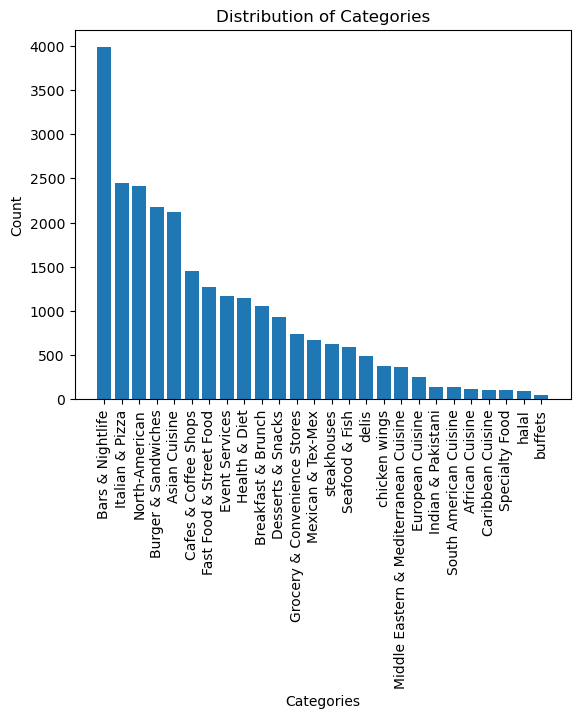

In [109]:
import matplotlib.pyplot as plt

# Assuming filtered_pa_df contains your data
category_counts = filtered_df2['categories'].value_counts()

# Create the bar plot using unique categories and their counts
plt.bar(category_counts.index, category_counts)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.xticks(rotation=90)
plt.show()
